In [ ]:
import sys
sys.path.insert(0, "..")
%load_ext autoreload
%autoreload 2

In [ ]:
from joblib import load
import pandas as pd
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tsfresh.transformers import FeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from collections import OrderedDict

sns.set(font_scale=1.5)

uoa_colours = OrderedDict([
    ('Dark blue', '#00467F'),
    ('Light blue', '#009AC7'),
    ('Silver', '#8D9091')
    ])
uoa_faculty_colours = OrderedDict([
    ('Arts', '#A71930'),
    ('Business', '#7D0063'),
    ('Creative Arts and Industries', '#D2492A'),
    ('Education and Social Work', '#55A51C'),
    ('Engineering', '#4F2D7F'),
    ('Auckland Law School', '#005B82'),
    ('Medical and Health Sciences', '#00877C'),
    ('Science', '#0039A6')
])

def faculty_color_palette(faculty='Engineering'):
    faculties = list(uoa_faculty_colours.keys())
    assert faculty in faculties
    faculties.insert(0, faculties.pop(faculties.index(faculty)))
    colors = uoa_colours.copy()
    for faculty in faculties:
        colors[faculty] = uoa_faculty_colours[faculty]
    return sns.color_palette([color for name, color in colors.items()])

engineering_colors = faculty_color_palette()

sns.set_palette(engineering_colors)
sns.set_style('darkgrid')

In [ ]:
# X = pd.read_hdf('../data/features/X_at_v_hex.h5')
# y = pd.read_hdf('../data/features/y_at_v_hex.h5')
# subject = pd.read_hdf('../data/FINAL/subject_at_v_hex.h5')
# subject.unique()

In [262]:
grid = load('../models/FINAL/rf_gridsearch_CV_at_v_hex.joblib')
fs = load('../models/FINAL/feature_selector_at_v_hex.joblib')

In [258]:
results = pd.DataFrame(grid.cv_results_)

In [259]:
results.sort_values('rank_test_F1-score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,...,split4_test_F1-score,split5_test_F1-score,split6_test_F1-score,split7_test_F1-score,split8_test_F1-score,split9_test_F1-score,split10_test_F1-score,mean_test_F1-score,std_test_F1-score,rank_test_F1-score
9,0.934787,0.034675,0.051465,0.001118,10,100,"{'max_depth': 10, 'n_estimators': 100}",1.0,1.0,1.0,...,0.461538,1.0,1.0,1.0,0.983051,1.0,1.0,0.949508,0.154386,1
4,4.089853,0.079993,0.112746,0.006287,2,500,"{'max_depth': 2, 'n_estimators': 500}",1.0,1.0,1.0,...,0.461538,1.0,1.0,1.0,0.983051,1.0,1.0,0.949508,0.154386,1
6,0.937178,0.028072,0.049978,0.002296,5,100,"{'max_depth': 5, 'n_estimators': 100}",1.0,1.0,1.0,...,0.500000,1.0,1.0,1.0,0.928571,1.0,1.0,0.948052,0.143152,3
10,4.313507,0.189865,0.115911,0.002689,10,500,"{'max_depth': 10, 'n_estimators': 500}",1.0,1.0,1.0,...,0.421053,1.0,1.0,1.0,0.983051,1.0,1.0,0.945828,0.166019,4
7,4.311785,0.187533,0.116235,0.002836,5,500,"{'max_depth': 5, 'n_estimators': 500}",1.0,1.0,1.0,...,0.421053,1.0,1.0,1.0,0.983051,1.0,1.0,0.945828,0.166019,4


In [260]:
results.sort_values('rank_test_F1-score').iloc[0,:]

mean_fit_time                                          0.934787
std_fit_time                                          0.0346746
mean_score_time                                       0.0514651
std_score_time                                       0.00111825
param_max_depth                                              10
param_n_estimators                                          100
params                   {'max_depth': 10, 'n_estimators': 100}
split0_test_Accuracy                                          1
split1_test_Accuracy                                          1
split2_test_Accuracy                                          1
split3_test_Accuracy                                          1
split4_test_Accuracy                                        0.3
split5_test_Accuracy                                          1
split6_test_Accuracy                                          1
split7_test_Accuracy                                          1
split8_test_Accuracy                    

In [249]:
len(fs.relevant_features)

2250

In [250]:
len(grid.cv[0][0]) + len(grid.cv[0][1])

810

In [ ]:
# qt_10 = results[results['param_max_features'] == 'log2']
fg = sns.FacetGrid(data = results, hue='param_max_depth', aspect=1.61, height=6)
fg.map(plt.plot, 'param_n_estimators', 'mean_test_F1-score').add_legend(title='Max Depth')
# fg.set(xlabel='Inverse Regularisation Strength (C)', ylabel='Mean Score', title='Tuning the Logistic Regression Model (n_quantiles = 10)')

# plt.scatter(results['param_n_estimators'], results['mean_test_F1-score'])

In [273]:
forest = grid.best_estimator_
# score = grid.best_score_
# params = grid.best_params_

In [274]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [284]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
imp = 0
impcount = 0
change = 0
changecount = 0
welch = 0
wc = 0
ff = 0
fc = 0
ar=0
ac=0
c=0
for f in range(200):
    if 'number_cwt_peaks' in fs.relevant_features[indices[f]]:
        imp += importances[indices[f]]
        impcount += 1
    elif 'change_quantiles__f_agg' in fs.relevant_features[indices[f]]:
        change += importances[indices[f]]
        changecount += 1
    elif 'spkt_welch_density__coeff' in fs.relevant_features[indices[f]]:
        welch += importances[indices[f]]
        wc+=1
    elif 'cid_ce' in fs.relevant_features[indices[f]]:
        ff += importances[indices[f]]
        fc+=1
    elif 'ar_coefficient' in fs.relevant_features[indices[f]]:
        ar += importances[indices[f]]
        ac+=1
    if 'diff' in fs.relevant_features[indices[f]]:
        c += 1
    # print("%d. feature %s (%f)" % (f + 1, fs.relevant_features[indices[f]], importances[indices[f]]))

Feature ranking:


In [167]:
X_impt = pd.DataFrame()
for f in range(5):
    X_impt = pd.concat([X_impt, X[fs.relevant_features].loc[:,fs.relevant_features[indices[f]]]], axis=1)

In [168]:
X_impt['Drug Administered'] = y
X_impt.columns = ['Feature 1','Feature 2', 'Feature 3', 'Feature 4', 'Feature 5','Drug Administered']

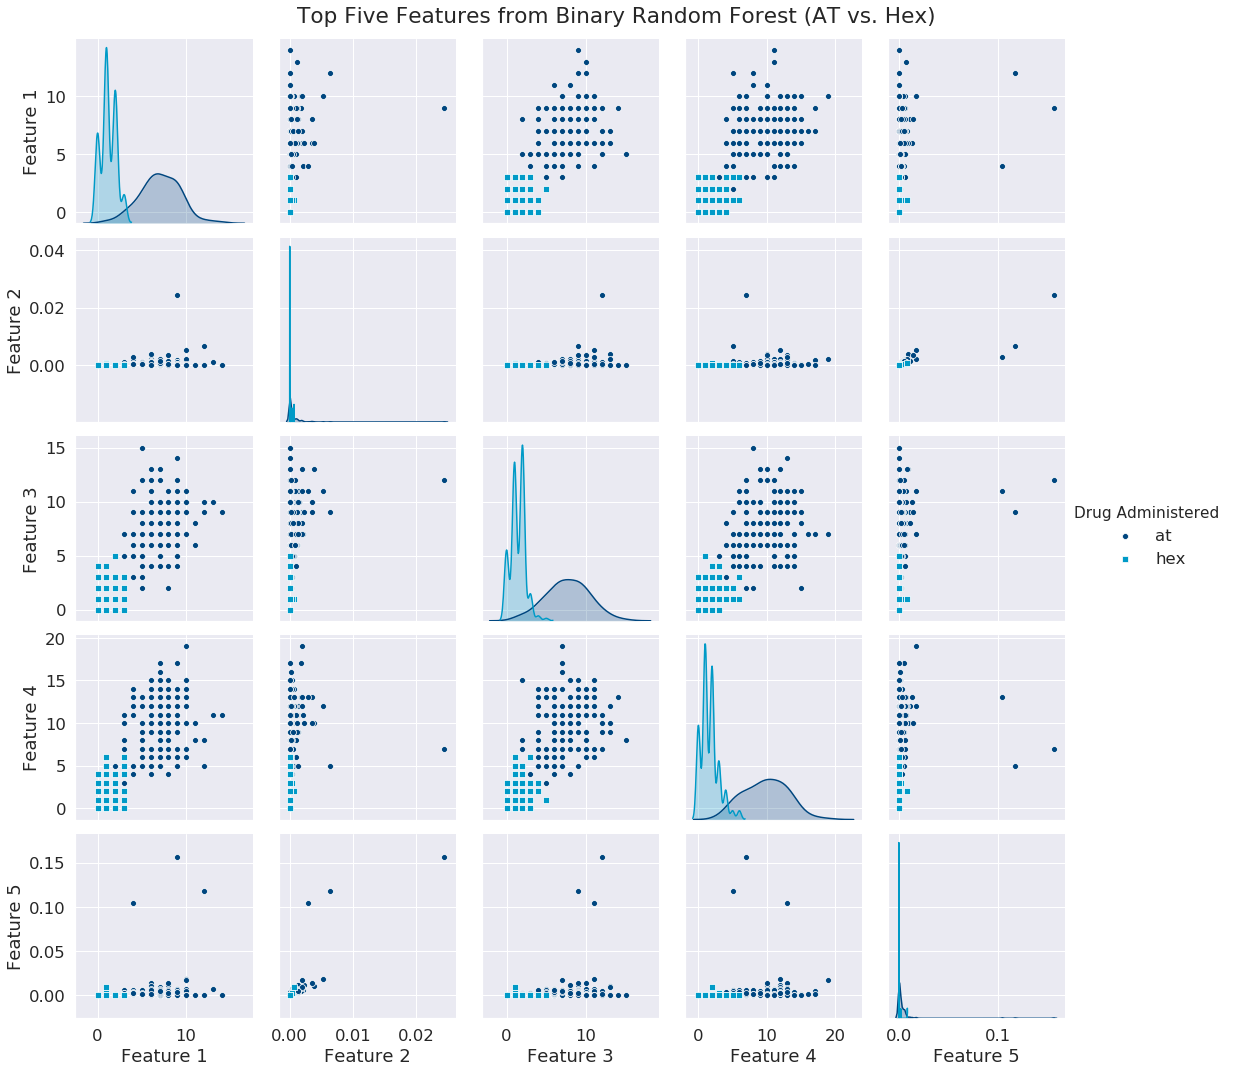

In [169]:
pp = sns.pairplot(X_impt, hue='Drug Administered', markers=["o", "s"], height=3, aspect=1)
pp.fig.subplots_adjust(top=0.95)
pp.fig.suptitle('Top Five Features from Binary Random Forest (AT vs. Hex)')
pp.savefig('../reports/figures/at_v_hex_top5_pairs')

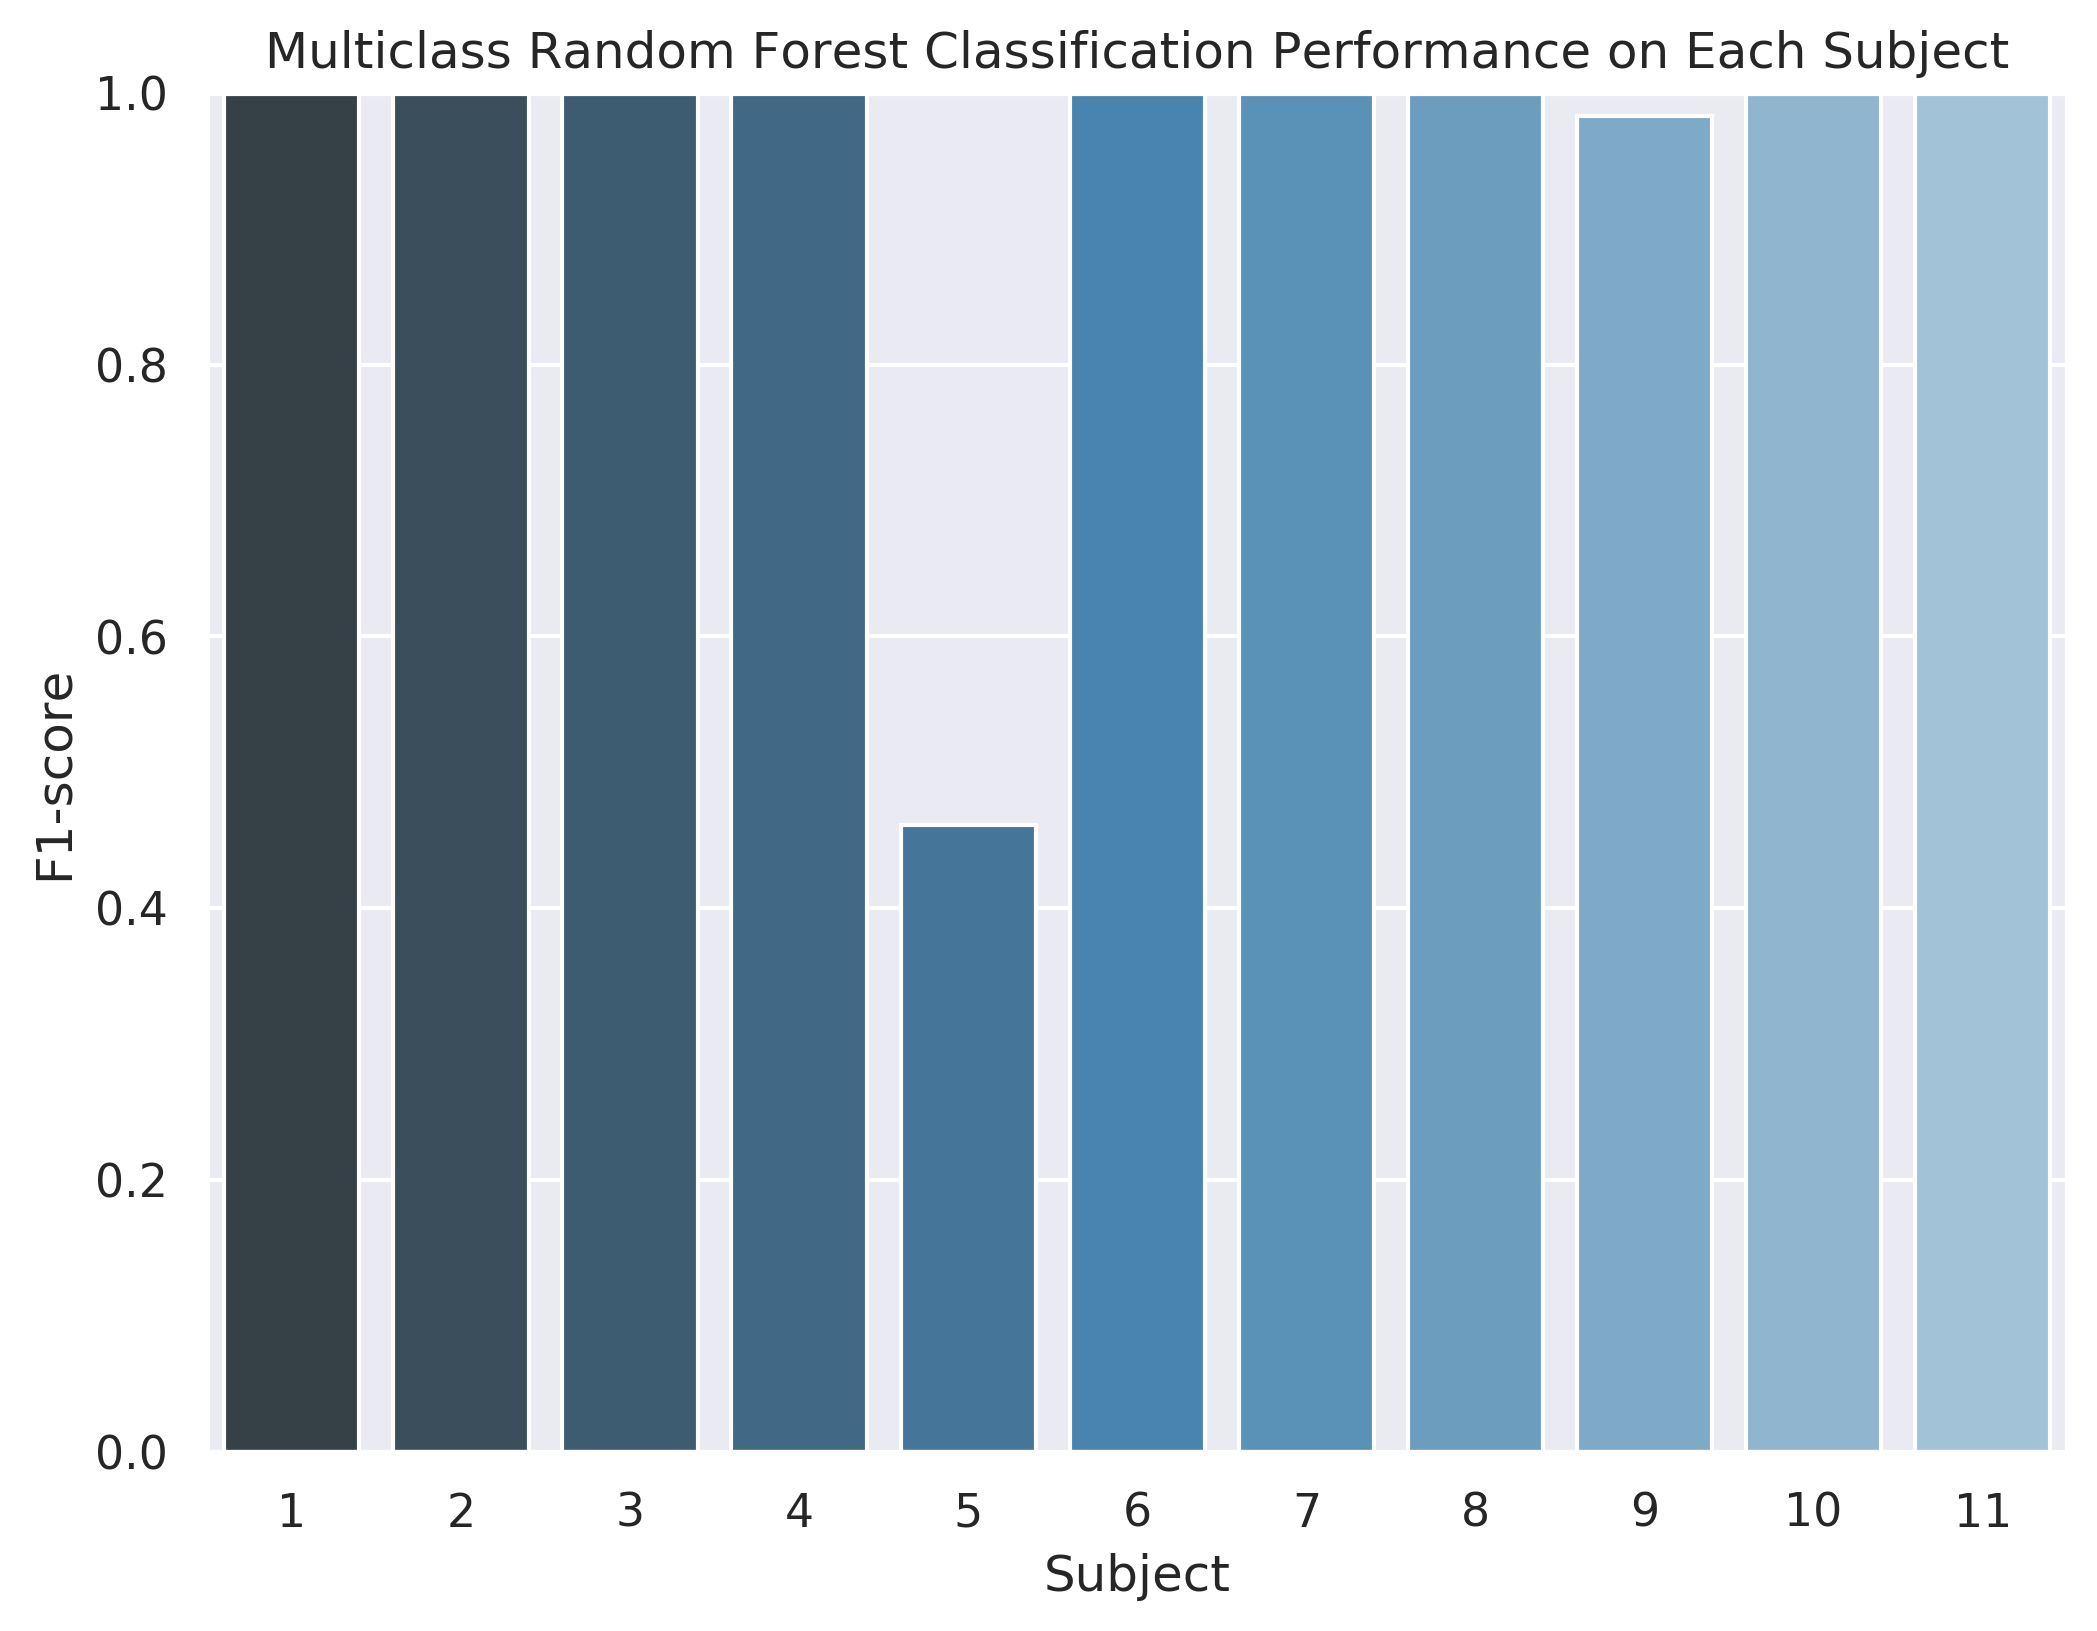

In [261]:
best = pd.DataFrame(results.iloc[grid.best_index_,:])
best = best.T
splits = []
for i in range(0,11):
    split = best[[col for col in best if col.startswith('split'+str(i)+'_test')]]
    split.columns = split.columns.str.lstrip('split'+str(i)+'_test_')
    split.index = [i]
    splits.append(split)

scores = pd.concat(splits)
scores['test_subject'] = scores.index+1
sns.set()
sns.set_style(style="darkgrid")
scores2 = pd.melt(scores, id_vars='test_subject', value_vars=['F1-score'],
var_name='metric',value_name='score')
scores2.columns = ['Test Set (Subject)', 'metric', 'F1-score']
plt.figure(figsize=(8,6), dpi=300)
g = sns.barplot(x='test_subject', y='F1-score', data=scores, palette='Blues_d')
# g.fig.subplots_adjust(top=0.95)
g.set_title('Multiclass Random Forest Classification Performance on Each Subject')
g.set_xlabel('Subject')
g.set_ylim(0,1)
plt.savefig('../reports/figures/at_v_hex_f1_cv.png')
plt.show()